In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("pm_nasa.xlsx")

In [3]:
df.tail(5)

,StationNum,GMT,AQS,LAT,LON,YEAR,MONTH,DAY,MODHR,TAU,...,PM24H,RUCHR,RUCPIX,TMP,RH,WS10m,WS925,HPBL,PRS,VIS
23277,320,-5,371170001,35.81,-76.90,2006,12,30,15.25,0.07,...,10.67,15,6,280.12,88.94,0.93,6.11,124.83,1033.20,9.34
23278,344,-5,371910005,35.37,-77.99,2006,12,30,16.83,0.10,...,13.08,17,8,286.85,57.07,2.21,3.01,290.00,1028.37,20.85
23279,320,-5,371170001,35.81,-76.90,2006,12,31,15.92,0.17,...,13.38,16,6,287.57,55.72,3.08,0.88,442.83,1028.75,21.33
23280,330,-5,371290002,34.36,-77.84,2006,12,31,15.92,0.12,...,8.96,16,5,290.58,65.91,2.95,7.67,575.80,1027.60,15.76
23281,250,-6,280110001,33.75,-90.72,2006,12,31,17.58,0.11,...,5.38,18,6,288.20,65.30,5.93,8.69,872.67,1011.98,17.03


In [4]:
df.columns

Index(['StationNum', 'GMT', 'AQS', 'LAT', 'LON', 'YEAR', 'MONTH', 'DAY',
       'MODHR', 'TAU', 'CLOUD', 'MODPIX', 'PM1H', 'PM24H', 'RUCHR', 'RUCPIX',
       'TMP', 'RH', 'WS10m', 'WS925', 'HPBL', 'PRS', 'VIS'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C9DCBCDC18>,
      dtype=object)

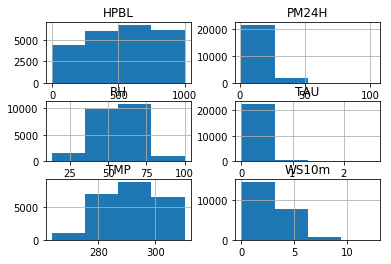

In [33]:
df1 = df[['TAU','PM24H','TMP','RH','HPBL','WS10m']]
df1.hist(bins=4)
# df['PM24H'].hist(bins=4)
# df['TMP'].hist(bins=4)
# df['RH'].hist(bins=4)

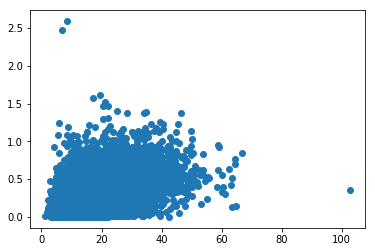

In [46]:
plt.scatter(df['PM24H'],df['TAU'])

Slope: [[22.49910348]]
Intercept: [11.03622993]
Root mean squared error:  38.33489089546967
R2 score:  0.32882715674485585


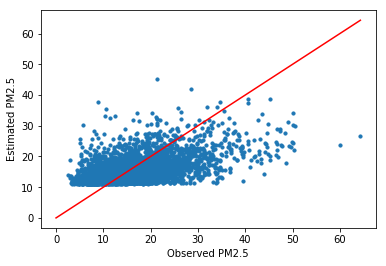

In [91]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn


# generate random data-set
np.random.seed(0)
# x = pd.DataFrame(df[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])
x=  pd.DataFrame(df['TAU'])
y = pd.DataFrame(df['PM24H'])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0)

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(y_test, y_predicted, s=10)
plt.xlabel('Observed PM2.5')
plt.ylabel('Estimated PM2.5')

# predicted values
t = np.linspace(0, y_test.max(), 10)
plt.plot(t, t, color='r')
# plt.show()|

Slope: [[ 1.59472688e+01 -4.35072591e-02  2.61970593e-01 -1.80879878e-03
  -7.65309206e-01 -4.19783460e-02]]
Intercept: [-58.30456101]
Root mean squared error:  32.06037057931678
R2 score:  0.438682370683972


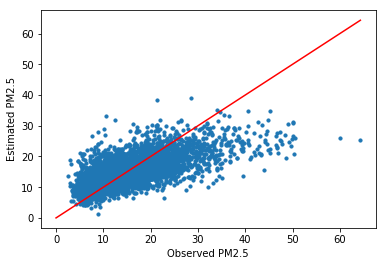

In [99]:
#MULTIPLE REGRESSION


# generate random data-set
np.random.seed(0)
x = pd.DataFrame(df[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])

y = pd.DataFrame(df['PM24H'])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0)

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(y_test, y_predicted, s=10)
plt.xlabel('Observed PM2.5')
plt.ylabel('Estimated PM2.5')

t = np.linspace(0, y_test.max(), 10)
plt.plot(t, t, color='r')
# plt.show()

In [97]:
d1 = df.loc[df['StationNum'] == 18]
d1.head()

,StationNum,GMT,AQS,LAT,LON,YEAR,MONTH,DAY,MODHR,TAU,...,PM24H,RUCHR,RUCPIX,TMP,RH,WS10m,WS925,HPBL,PRS,VIS
1369,18,-6,10890014,34.69,-86.58,2004,3,22,16.58,0.04,...,7.29,17,4,279.57,41.41,5.02,8.85,251.00,1000.20,29.94
1414,18,-6,10890014,34.69,-86.58,2004,3,23,17.25,0.08,...,11.00,17,4,285.03,32.77,3.48,4.71,360.75,1000.90,37.26
1488,18,-6,10890014,34.69,-86.58,2004,3,25,17.08,0.15,...,17.25,17,4,294.47,50.53,4.76,7.91,162.50,1001.40,22.71
1515,18,-6,10890014,34.69,-86.58,2004,3,26,16.17,0.32,...,11.58,16,4,294.28,60.03,4.83,8.93,143.75,999.35,18.11
1557,18,-6,10890014,34.69,-86.58,2004,3,28,15.92,0.07,...,14.38,16,4,296.72,54.96,2.86,8.49,581.50,993.25,19.70


Slope: [[ 1.59472688e+01 -4.35072591e-02  2.61970593e-01 -1.80879878e-03
  -7.65309206e-01 -4.19783460e-02]]
Intercept: [-58.30456101]
Root mean squared error:  31.753157067903942
R2 score:  0.4651726402552947


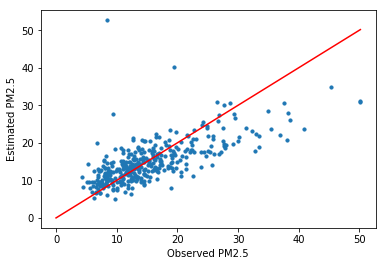

In [100]:
#Predict
x = pd.DataFrame(d1[['TAU', 'RH','TMP','HPBL','WS10m','CLOUD']])
y = d1['PM24H']
y_predicted = regression_model.predict(x)




# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(y, y_predicted, s=10)
plt.xlabel('Observed PM2.5')
plt.ylabel('Estimated PM2.5')

# predicted values
t = np.linspace(0, y.max(), 10)
plt.plot(t, t, color='r')
# plt.show()

In [73]:
from scipy.stats import linregress

In [77]:
a = list(df['TAU'].values)
b = list(df['PM24H'].values)
linregress(a,b)

LinregressResult(slope=22.756035076199847, intercept=11.014390289589723, rvalue=0.553622734996213, pvalue=0.0, stderr=0.22434428331361628)

In [79]:
df1.corr()

,TAU,PM24H,TMP,RH,HPBL,WS10m
TAU,1.000000,0.553623,0.534821,0.281629,0.014602,-0.139001
PM24H,0.553623,1.000000,0.527427,0.133708,-0.000035,-0.284852
TMP,0.534821,0.527427,1.000000,0.223526,0.209034,-0.162217
RH,0.281629,0.133708,0.223526,1.000000,-0.233009,-0.076583
HPBL,0.014602,-0.000035,0.209034,-0.233009,1.000000,0.175562
WS10m,-0.139001,-0.284852,-0.162217,-0.076583,0.175562,1.000000
